In [6]:
import psycopg2
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [21]:
client = psycopg2.connect(database="main",
        host="localhost",
        user="user",
        password="pass",
        port="5432"
    )

In [22]:
questions_count_per_year = pd.read_sql("""
    select count(id) as nb, extract(year from asked_at) as years from question
    group by years
    order by years
""", client)

fig = px.line(questions_count_per_year, x='years', y='nb', title="Nombre de questions par année")
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\3417620133.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [23]:
questions_count_per_category = pd.read_sql("""
    select count(*) as nb, name from question
    join question_category qc on qc.question_id = question.id
    join category on qc.category_id = category.id
    group by name
    order by nb desc
    limit 35
""", client)

fig = px.bar(questions_count_per_category, x='name', y='nb', title="Nombre de questions par catégorie")
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\2536385046.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [35]:
CATEGORY = "docker"
similars = pd.read_sql(f"""
    select count(*) as nb, c.name from question_category qc
    join question_category qc1 on qc.question_id = qc1.question_id
    join category c on qc1.category_id = c.id
    join category c1 on qc.category_id = c1.id
    where c1.name = '""" + CATEGORY + """' and qc.id <> qc1.id
    group by c.name
    order by nb desc
    limit 25
""", client)

total = np.sum(similars["nb"])
similars["percent"] = similars["nb"] / total * 100

fig = px.bar(similars, x='name', y='percent', title="Catégories similaires à " + CATEGORY + " (en % de similarité)")
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\189076309.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [34]:
TECHO = "docker"

questions_count_per_year = pd.read_sql("""
    select count(q.id) as nb, extract(year from asked_at) as years from question q
    join question_category qc on qc.question_id = q.id
    join category c on c.id = qc.category_id
    where c.name = '""" + TECHO + """' 
    group by years
    order by years
""", client)

fig = px.line(questions_count_per_year, x='years', y='nb', title="Nombre de questions par année pour " + TECHO)
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\4151160715.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [32]:
TECHO = "python"

questions_count_per_day = pd.read_sql("""
    select count(q.id) as nb, date_part('isodow', asked_at) as weekday from question q
    join question_category qc on qc.question_id = q.id
    join category c on c.id = qc.category_id
    where c.name = '""" + TECHO + """' 
    group by weekday
""", client)

days = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
questions_count_per_day["day"] = questions_count_per_day["weekday"].apply(lambda x: days[int(x)-1])

fig = px.bar(questions_count_per_day, x='day', y='nb', title="Nombre de questions par jour de la semaine pour " + TECHO)
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\4271224414.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



C:\Users\charl\AppData\Local\Temp\ipykernel_25616\1623151039.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\1623151039.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\1623151039.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\charl\AppData\Local\Temp\ipykernel_25616\1623151039.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 conn

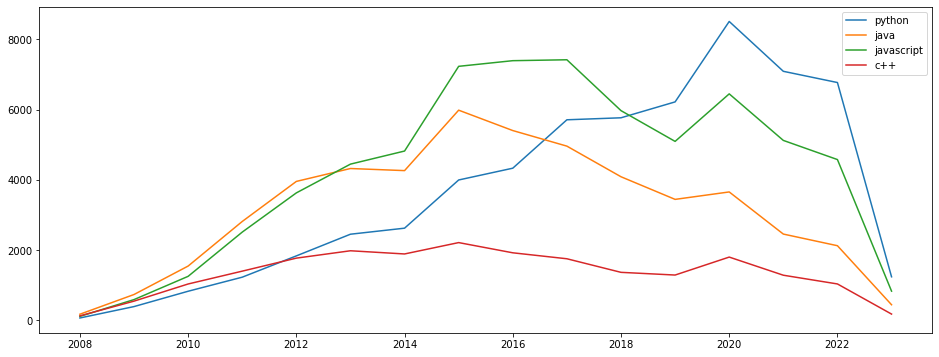

In [30]:
TECHOS = ["python", "java", "javascript", "c++"]
df = pd.DataFrame()

plt.figure(figsize=(16,6))
for tech in TECHOS:
    data = pd.read_sql("""
        select count(q.id) as nb, extract(year from asked_at) as years from question q
        join question_category qc on qc.question_id = q.id
        join category c on c.id = qc.category_id
        where c.name = '""" + tech + """' 
        group by years
        order by years
    """, client)

    plt.plot(data["years"], data["nb"], label=tech)
plt.legend()